# Force Movement Dynamics Analysis

This notebook analyzes force movement dynamics and Euclidean distances between trials across a multi-day training experiment.

## Overview

The analysis focuses on:
- **Force Movement Dynamics**: Visualizing force distance matrices and execution times across training days.
- **Neighbouring Trial Distances**: Calculating Euclidean distances between adjacent trials while controlling for execution time differences.
- **Triplet Analysis**: Comparing force distances between the first and last trials of triplets, categorized by whether the middle trial was an error.

## Data Structure

The primary dataset (`data`) contains the following key columns:
- `SubNum`: Subject identifier.
- `ET`: Execution time in milliseconds.
- `day`: Experiment day.
- `isError`: Boolean flag for trial errors.
- `PC_{i}`: PCA reduced components of normalized force traces (15 components)
- `seq` & `hand`: Sequence and hand identifiers.



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import seaborn as sns
import importlib
from tqdm import tqdm
import setglobals as gl

utils.set_figure_style(scale="1col")

sns.set_palette("colorblind")


In [ ]:
### DATA LOADING
### Change gl.data_dir to your data directory in setglobals.py before running
data = pd.read_csv(gl.data_dir + 'SL3_Forces.csv', sep = '\t')
data['forceVector'] = data[[col for col in data.columns if col.startswith('PC_')]].apply(lambda x: np.array(x), axis=1)
data = data.drop(columns=[col for col in data.columns if col.startswith('PC_')])

# change correspondingly for each experiment
n_trials_per_block = 20
n_blocks_per_day = 20
n_trials_per_day = n_trials_per_block * n_blocks_per_day
n_days = 3

# - SubNum: Subject number (e.g., 1 to 16 (exlcuding 8))
# - BN: Block number
# - TN: Trial number within the block (integer, from 1 to n_trials_per_block)
# - ET: Execution time in milliseconds
# - day: Day of the experiment (from 1 to n_days)
# - isError: Boolean flag indicating if the trial was an error (True/False)
# - T: Overall trial number across the experiment
# - seq: Sequence identifier (integer)
# - hand: Hand used (integer, e.g., 0 or 1 for left/right)
# - points: Points scored in the trial (-1 for error, 0, 1, or 3 for correct)
# - forceVector: Numpy array of force components after PCA

print(data.columns.tolist())  # To list the column names


['SubNum', 'BN', 'TN', 'ET', 'day', 'isError', 'T', 'seq', 'hand', 'points', 'forceVector']


## Force Distances Across Training

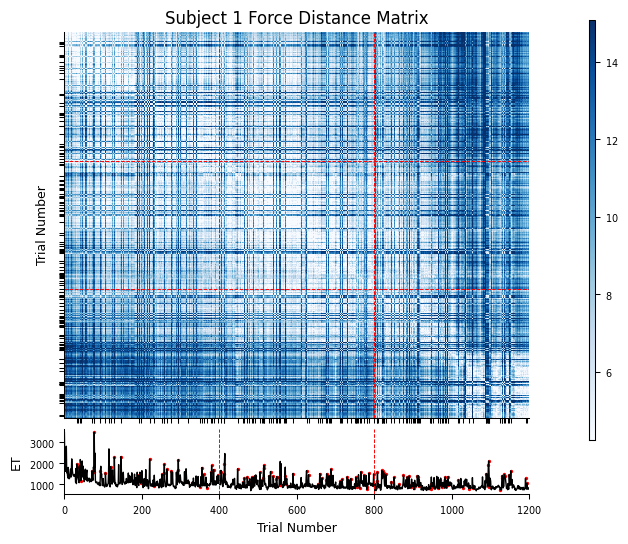

In [6]:
# This function plots the force distance matrix for a given subject across all trials.
# Red dashed lines separate days. Below the heatmap, it plots execution times aligned with the trials.
# Red dots indicate error trials.

# Parameters:
# - data: experiment data
# - subj: int, the subject number to plot
# - n_trials_per_day
# - n_days

utils.plot_force_movement_dynamics(data, subj=1, n_trials_per_day=n_trials_per_day, n_days=n_days)

## Neighbouring Trial Force Distance

100%|██████████| 15/15 [00:00<00:00, 23.75it/s]


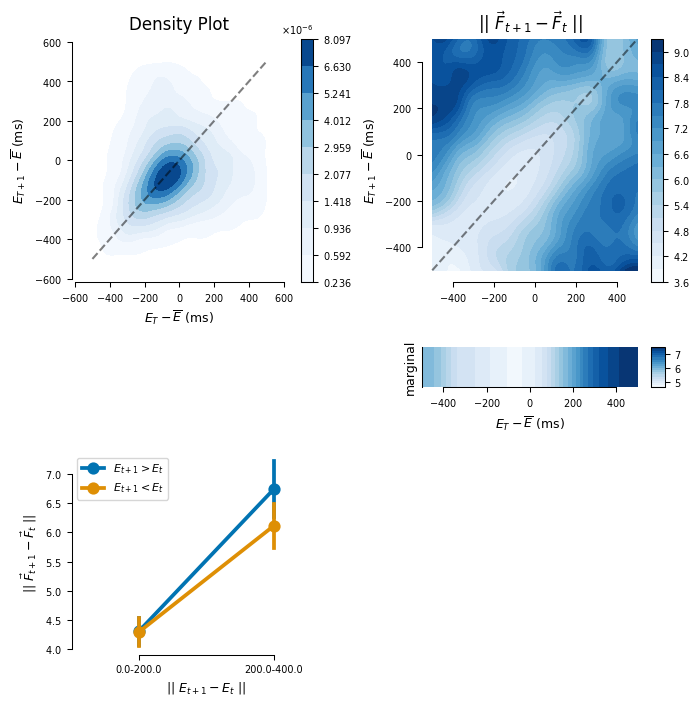

ANOVA results for neighbour distances:
                        Anova
                        F Value Num DF  Den DF Pr > F
-----------------------------------------------------
ET_diff_bin             54.5510 1.0000 14.0000 0.0000
is_pos_diff              4.2709 1.0000 14.0000 0.0578
ET_diff_bin:is_pos_diff  3.7312 1.0000 14.0000 0.0739



In [7]:
# Calculating the uclidean force distance between neighbouring trials.
# Controls for execution time differences.

distances = utils.calc_neighbour_distances(data)
utils.plot_neighbour_distances(distances)

# Neighbouring Triplets

100%|██████████| 15/15 [00:01<00:00, 14.23it/s]


ANOVA results for for triplet distances::
                          Anova
                            F Value Num DF  Den DF Pr > F
---------------------------------------------------------
ET_diff_bin                 22.0851 1.0000 14.0000 0.0003
is_middle_error              4.5944 1.0000 14.0000 0.0501
ET_diff_bin:is_middle_error  0.0329 1.0000 14.0000 0.8586



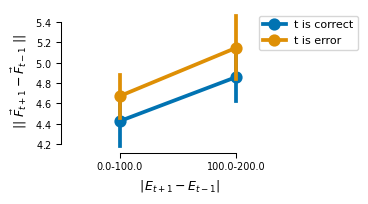

In [8]:
# Calculating the uclidean force distance between first and last trials of each triplet.
# Depending on whether the middle trial is error or correct.
# Controls for execution time differences.

distances = utils.calc_triplet_distances(data)
utils.plot_triplet_distances(distances)